### loan the dataset & explore

In [51]:
# reqire library import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [52]:
df=pd.read_csv("data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [53]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [54]:
df.shape

(294, 14)

In [55]:
df.dtypes

age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
slope          object
ca             object
thal           object
num             int64
dtype: object

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [57]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


### check  missing value

In [58]:
# missing value per column
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [59]:
# duplicate value check
df.duplicated().sum()

1

In [60]:
# drop duplicateds
df.drop_duplicates(inplace=True)

In [61]:
# check garbage value
for col in df.columns:
    if df[col].dtype == "object":
        print(f"{col}:{df[col].unique()}\n")
        print(f"{len(df[col].unique())}\n")

trestbps:['130' '120' '140' '170' '100' '105' '110' '125' '150' '98' '112' '145'
 '190' '160' '115' '142' '180' '132' '135' '?' '108' '124' '113' '122'
 '92' '118' '106' '200' '138' '136' '128' '155']

32

chol:['132' '243' '?' '237' '219' '198' '225' '254' '298' '161' '214' '220'
 '160' '167' '308' '264' '166' '340' '209' '260' '211' '173' '283' '194'
 '223' '315' '275' '297' '292' '182' '200' '204' '241' '339' '147' '273'
 '307' '289' '215' '281' '250' '184' '245' '291' '295' '269' '196' '268'
 '228' '358' '201' '249' '266' '186' '207' '218' '412' '224' '238' '230'
 '163' '240' '280' '257' '263' '276' '284' '195' '227' '253' '187' '202'
 '328' '168' '216' '129' '190' '188' '179' '210' '272' '180' '100' '259'
 '468' '274' '320' '221' '309' '312' '171' '208' '246' '305' '217' '365'
 '344' '394' '256' '326' '277' '270' '229' '85' '347' '251' '222' '287'
 '318' '213' '294' '193' '271' '156' '267' '282' '117' '466' '247' '226'
 '265' '206' '288' '303' '338' '248' '306' '529' '392' '231' '

In [62]:
data=["trestbps","chol","fbs","restecg","thalach","exang","slope","ca","thal"]
for col in data:
    df[data]=df[data].replace("?",np.nan)

In [63]:
# check missing value
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           22
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         189
ca            290
thal          265
num             0
dtype: int64

In [64]:
# numeric columns 
num_cols=df.select_dtypes(include="number").columns
num_cols

Index(['age', 'sex', 'cp', 'oldpeak', 'num       '], dtype='object')

In [65]:
# category columns
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca',
       'thal'],
      dtype='object')

In [66]:
# numeric columns null values fill with median
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
# category columns null values fill with mode
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [67]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [68]:
# category columns datatype convert into integer
df[cat_cols]=df[cat_cols].astype(int)

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,2,0,7,0
1,29,1,2,120,243,0,0,160,0,0.0,2,0,7,0
2,29,1,2,140,230,0,0,170,0,0.0,2,0,7,0
3,30,0,1,170,237,0,1,170,0,0.0,2,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2,0,7,0


###  some data visuals

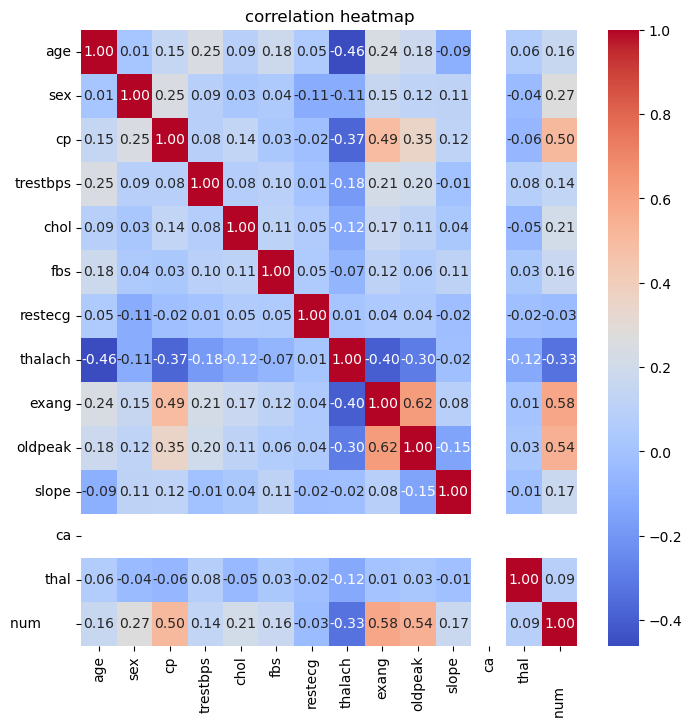

In [70]:
# correlation heatmap to check dependend columns
numeric_cols=df.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(numeric_cols,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

In [71]:
# column name change
df=df.rename(columns={'num       ':'num'})

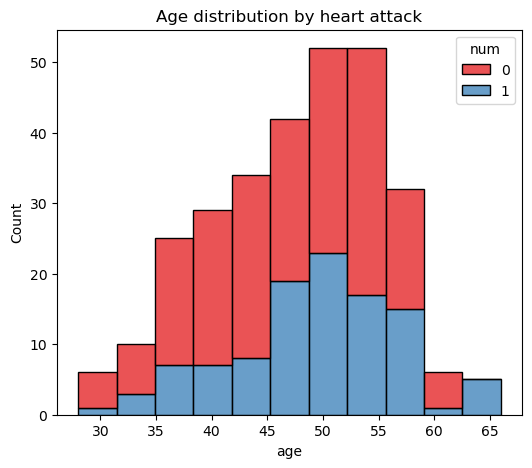

In [76]:
plt.figure(figsize=(6,5))
sns.histplot(data=df,x="age",hue="num",multiple="stack",palette="Set1")
plt.title("Age distribution by heart attack")
plt.show()

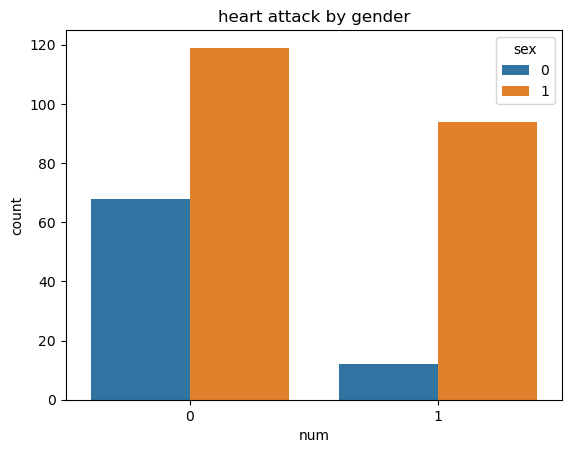

In [77]:
plt.figure()
sns.countplot(data=df,x="num",hue="sex")
plt.title("heart attack by gender")
plt.show()

### model  evaluation

In [79]:
# import requre machine learning algorythms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest,f_classif

In [80]:
x=df.drop(["num"],axis=1)
y=df["num"]
k_best=SelectKBest(score_func=f_classif,k=10)
input_cols=k_best.fit_transform(x,y)

In [81]:
best_cols=k_best.get_support(indices=True)
select_feature=df.columns[best_cols]
select_feature

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'slope'],
      dtype='object')

In [82]:
# data divited into input and target
inputs=df[["age","sex","cp","trestbps","chol","fbs","thalach","exang","oldpeak","slope"]]
target=df["num"]

In [84]:
# split data into train and test the models
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=42)
print(len(X_train))

234


In [85]:
print(X_train.shape)

(234, 10)


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [88]:
models={
    "Logistic Regression":Pipeline([
        ("imputer",SimpleImputer(strategy="mean")),
        ("model",LogisticRegression(max_iter=1000))
    ]),
    "Random Forest":Pipeline([
        ("imputer",SimpleImputer(strategy="mean")),
        ("model",RandomForestClassifier(n_estimators=100,random_state=42))
    ]),
    "Gradient Boosting":Pipeline([
        ("imputer",SimpleImputer(strategy="mean")),
        ("model",GradientBoostingClassifier(n_estimators=100,random_state=42))
    ])
}
best_score=0
best_model=None

In [93]:
#  train and evaluate the model 
for name,model in models.items():
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=accuracy_score(y_test,pred)*100
    print(f"{name} Accuracy:{score:.4f}")
    if score > best_score:
        best_score=score
        best_model=model
print("\n✅Best Model :",best_model.named_steps["model"].__class__.__name__,"with Accuracy:",best_score)

Logistic Regression Accuracy:88.1356
Random Forest Accuracy:86.4407
Gradient Boosting Accuracy:83.0508

✅Best Model : LogisticRegression with Accuracy: 88.13559322033898


In [94]:
# classification report predicted by best model
print("\t\t\tClassification_Report")
y_pred=best_model.predict(X_test)
print(classification_report(y_test,y_pred))

			Classification_Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        41
           1       0.76      0.89      0.82        18

    accuracy                           0.88        59
   macro avg       0.85      0.88      0.87        59
weighted avg       0.89      0.88      0.88        59



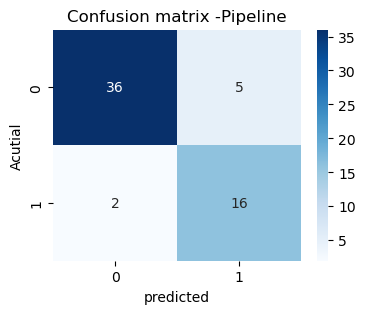

In [99]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("Acutial")
plt.title(f"Confusion matrix -{best_model.__class__.__name__}")
plt.show()

In [104]:
from sklearn.metrics import roc_curve,auc

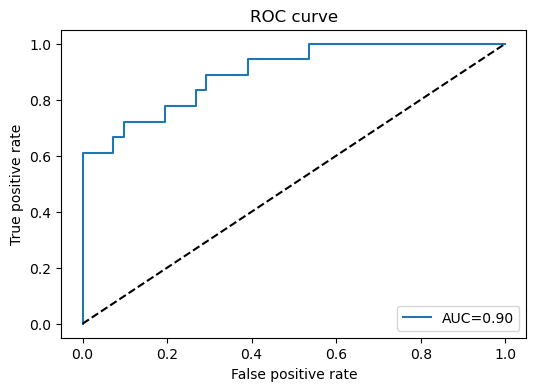

In [106]:
# ROC curve
y_score=model.predict_proba(X_test)[:,1]
fpr,tpr,theshholds=roc_curve(y_test,y_score)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.show()